In [372]:
import matplotlib.pyplot as plt
from PIL import Image

import eikonalfm
import numpy as np

In [383]:
def print_image(image, title, color_bar=False):
    plt.imshow(image)
    plt.axis('off')
    plt.title(title)
    if color_bar:
        plt.colorbar()
    plt.show()

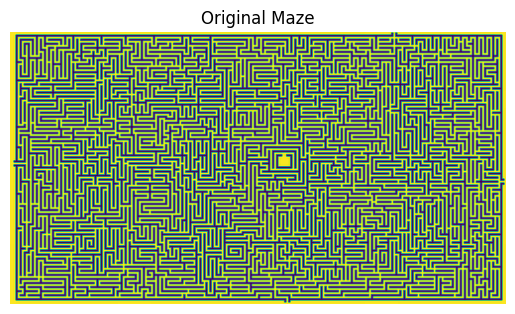

In [384]:
# Load the maze
MAZE_PATH = 'maze.png'
image = np.asarray(Image.open(MAZE_PATH).convert('L'))
image = image / np.max(image)
print_image(image, 'Original Maze')


In [385]:
THRESHOLD = 0.1
def make_speed_map(gray: np.ndarray, thr: float = THRESHOLD) -> np.ndarray:
    speed = np.ones_like(gray, dtype=float)
    speed[gray > thr] = 1000
    return speed

speed = make_speed_map(image)


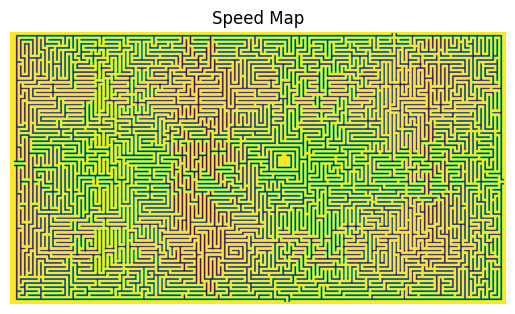

In [386]:
# Plot the speed map
print_image(speed, 'Speed Map', color_bar=False)

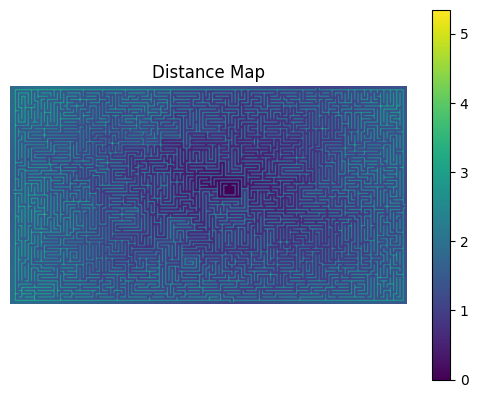

In [466]:
SOURCE_POINT = (383, 814)
distance_map = eikonalfm.fast_marching(speed, SOURCE_POINT, dx=(1,1), order=1)

print_image(distance_map, 'Distance Map', color_bar=True)

In [467]:
def back_trace_shortest_path(distance_map, target: tuple[2], source: tuple[2]):
    def check_if_neighbor_is_legal(neighbor, current_vertex):
        return 0 <= neighbor[0] < distance_map.shape[0] and 0 <= neighbor[1] < distance_map.shape[1] and neighbor != current_vertex

    path = [target]
    current_vertx = target
    while current_vertx != source:
        closest_val = float('inf')
        neighbors = [(current_vertx[0] + i, current_vertx[1] + j) for i in range(-1, 2) for j in range(-1, 2)]
        for neighbor in neighbors:
            if check_if_neighbor_is_legal(neighbor, current_vertx):
                if distance_map[neighbor[0], neighbor[1]] < closest_val:
                    closest_val = distance_map[neighbor[0], neighbor[1]]
                    next_vertx = neighbor
        current_vertx = next_vertx
        path.append(next_vertx)
    return path

TARGET_POINT = (233, 8)
path = back_trace_shortest_path(distance_map, TARGET_POINT, SOURCE_POINT)

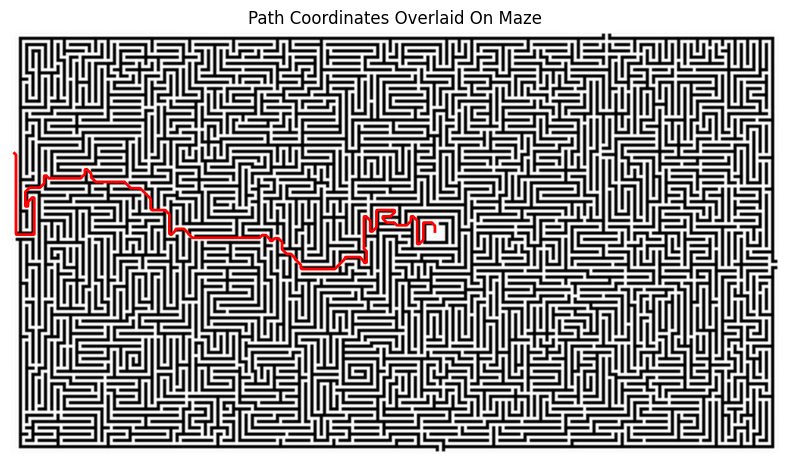

In [468]:
def plot_path_on_maze(path: list, maze_path: str):
    maze = np.asarray(Image.open(maze_path))
    ys, xs = zip(*path)
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.imshow(maze)

    plt.plot(xs, ys, color='red', linewidth=2)
    ax.set_title("Path Coordinates Overlaid On Maze")
    ax.axis('off')
    plt.tight_layout()
    plt.show()

plot_path_on_maze(path, MAZE_PATH)


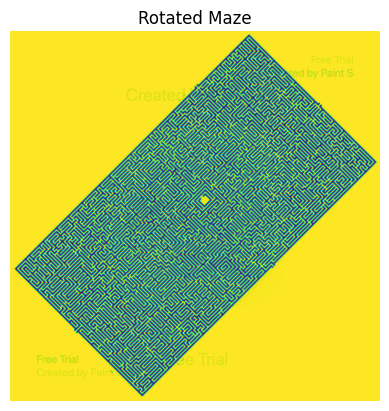

In [469]:
ROTATED_MAZE_PATH = 'rotated maze.png'
rotated_maze = np.asarray(Image.open(ROTATED_MAZE_PATH).convert('L'))
rotated_maze = rotated_maze / np.max(rotated_maze)

print_image(rotated_maze, 'Rotated Maze', color_bar=False)

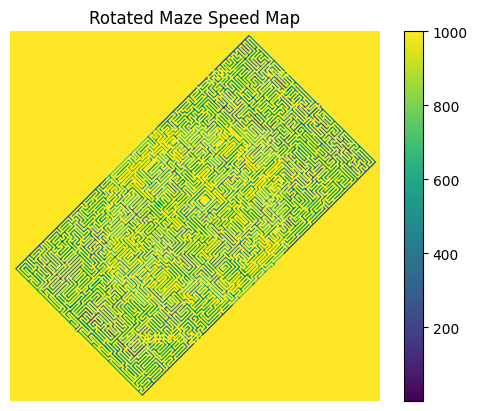

In [470]:
rot_speed = make_speed_map(rotated_maze)
print_image(rot_speed, 'rotated Maze Speed Map', color_bar=True)

In [ ]:
new_start = np.array([[385], [440]])
new_target = np.array([[633], [100]])


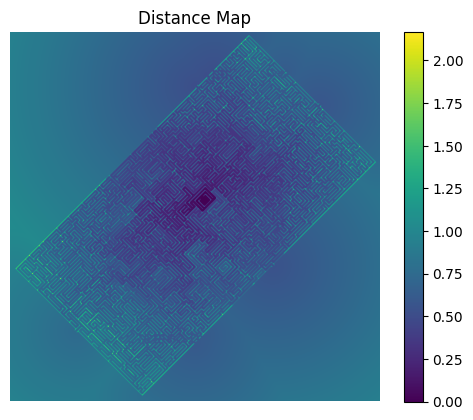

In [476]:
distance_map_rot = eikonalfm.fast_marching(rot_speed, list(new_start.squeeze(1)), dx=(1,1), order=2)

print_image(distance_map_rot, 'Distance Map', color_bar=True)

In [477]:
path = back_trace_shortest_path(distance_map_rot, tuple(new_target.squeeze(1)), tuple(new_start.squeeze(1)))

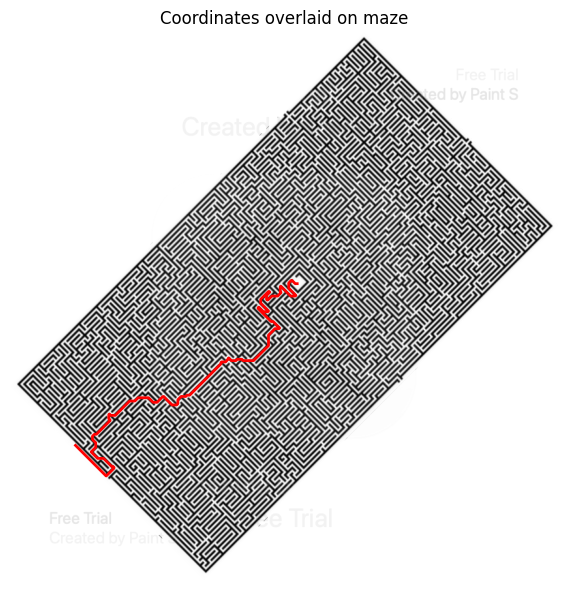

In [478]:
ys, xs = zip(*path)
fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(rotated_maze, cmap='gray')

plt.plot(xs, ys, color='red', linewidth=2)


ax.set_title("Coordinates overlaid on maze")
ax.axis('off')
plt.tight_layout()
plt.show()